# **Are alternative therapies being tested for treatment of the most common natural death causes?**

There are 20 csv files from https://clinicaltrials.gov searches for common Alternative Therapies  and 1 csv file from NCHS/CDC https://data.cdc.gov/NCHS/NCHS-Leading-Causes-of-Death-United-States/bi63-dtpu/about_data 




**Import some common alternative therapies dataframes along a with natural death data frame of the United States to see if there is a correlation.**

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


data1 = pd.read_csv("Acupuncture.csv")
data2 = pd.read_csv("Aromatherapy.csv")
data3 = pd.read_csv("Ayurveda.csv")
data4 = pd.read_csv("Cannabis.csv")
data5 = pd.read_csv("Chiropratic.csv")
data6 = pd.read_csv("Dietarysupplement.csv")
data7 = pd.read_csv("Electromagnetic.csv")
data8 = pd.read_csv("Exercise.csv")
data9 = pd.read_csv("Guidedimagery.csv")
data10 = pd.read_csv("Herbalmedicine.csv")
data11 = pd.read_csv("Hypnotherapy.csv")
data12 = pd.read_csv("Lighttherapy.csv")
data13 = pd.read_csv("Massage.csv")
data14 = pd.read_csv("Meditation.csv")
data15 = pd.read_csv("Mindbody.csv")
data16 = pd.read_csv("Musictherapy.csv")
data17 = pd.read_csv("Osteopathy.csv")
data18 = pd.read_csv("Reiki.csv")
data19 = pd.read_csv("TaiChi.csv")
data20 = pd.read_csv("Yoga.csv")

deaths = pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")

#Check to make sure we imported at least one dataframe successfully
print(data1.shape)
data1.head(5)



(2291, 18)


,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations
0,NCT06099223,Preoperative Acupuncture for Total Knee or Hip...,https://clinicaltrials.gov/study/NCT06099223,COMPLETED,NO,Knee Arthropathy|Hip Arthropathy|Anxiety,DEVICE: Acupuncture needles,Hartford Hospital,NaN,ALL,"ADULT, OLDER_ADULT",60.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2022-03-21,2023-05-03,"Bone and Joint Institute- Hartford Hospital, H..."
1,NCT06716411,Confirming the Effects of Acupuncture Treatmen...,https://clinicaltrials.gov/study/NCT06716411,NOT_YET_RECRUITING,NO,Persian Gulf Syndrome|Gulf War Syndrome|Multip...,DEVICE: Acupuncture,University of Utah,United States Department of Defense|University...,ALL,"ADULT, OLDER_ADULT",200.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2024-12-01,2028-09-30,"University of California, Berkeley, Berkeley, ..."
2,NCT03572608,Pregnancy Success Rates of Acupuncture for in ...,https://clinicaltrials.gov/study/NCT03572608,UNKNOWN,NO,"Infertility, Female",OTHER: Acupuncture treatment,Ataturk University,NaN,FEMALE,ADULT,120.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-06-01,2018-10-01,"Ataturk University Hospital, Erzurum, 25040, T..."
3,NCT02926378,Acupuncture for Stroke Recovery,https://clinicaltrials.gov/study/NCT02926378,TERMINATED,NO,Systematic Acupuncture,PROCEDURE: Acupuncture Treatments,NYU Langone Health,NaN,ALL,ADULT,3.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2016-11-18,2017-06-28,"New York University School of Medicine, New Yo..."
4,NCT02803736,Effectiveness of Acupuncture for Breast Cancer...,https://clinicaltrials.gov/study/NCT02803736,UNKNOWN,NO,Breast Cancer|Lymphedema|Acupuncture,DEVICE: acupuncture,Fourth Affiliated Hospital of Guangxi Medical ...,Liuzhou Hospital of Traditional Chinese Medici...,FEMALE,ADULT,150.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2016-12,2019-12,NaN


**Remove rows that do not contain treatment type and adds the treatment type as a new column constant.**

Cleaning some data prior to merge.  This step is repeated for all 20 alternative therapy dataframes.

In [2]:
#data1

word = 'Acupuncture'

data1 = data1[data1['Interventions'].str.contains(word, case=False, na=False)]
data1['Treatment']= 'Acupunture'

data1.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT06099223,Preoperative Acupuncture for Total Knee or Hip...,https://clinicaltrials.gov/study/NCT06099223,COMPLETED,NO,Knee Arthropathy|Hip Arthropathy|Anxiety,DEVICE: Acupuncture needles,Hartford Hospital,NaN,ALL,"ADULT, OLDER_ADULT",60.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2022-03-21,2023-05-03,"Bone and Joint Institute- Hartford Hospital, H...",Acupunture


In [3]:
#data2

word = 'Aromatherapy'

data2 = data2[data2['Interventions'].str.contains(word, case=False, na=False)]
data2['Treatment']= 'Aromatherapy'

data2.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
1,NCT02445378,Aromatherapy and Essential Oils in Improving I...,https://clinicaltrials.gov/study/NCT02445378,COMPLETED,NO,Acute Leukemia|Anorexia|Anxiety|Depression|Dys...,PROCEDURE: Aromatherapy and Essential Oils|OTH...,Ohio State University Comprehensive Cancer Center,NaN,ALL,"CHILD, ADULT, OLDER_ADULT",48,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2014-12-28,2016-11-05,Ohio State University Comprehensive Cancer Cen...,Aromatherapy


In [4]:
#data3

word = 'Ayurveda'

data3 = data3[data3['Interventions'].str.contains(word, case=False, na=False)]
data3['Treatment']= 'Ayurveda'

data3.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
1,NCT04395976,Ayurveda as Prophylaxis for Suspected COVID-19...,https://clinicaltrials.gov/study/NCT04395976,WITHDRAWN,NO,Covid-19,OTHER: Ayurveda,British Ayurvedic Medical Council,All Party Parliamentary Group - Indian Traditi...,ALL,"ADULT, OLDER_ADULT",0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-05-10,2020-09-01,"British Ayurvedic Medical Council, London, Uni...",Ayurveda


In [5]:
#data4

word = 'Cannabis'

data4 = data4[data4['Interventions'].str.contains(word, case=False, na=False)]
data4['Treatment']= 'Cannabis'

data4.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT06807762,Safety and Pharmacokinetics of Extrato De Cann...,https://clinicaltrials.gov/study/NCT06807762,RECRUITING,NO,Healthy,DRUG: Cannabis oil,GreenCare Pharma,NaN,ALL,"ADULT, OLDER_ADULT",72.0,INDUSTRY,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2025-03-10,2025-12,"GreenCare Pharma, Vinhedo, Sao Paulo, 13288006...",Cannabis


In [6]:
#data5

word = 'Chiropractic'

data5 = data5[data5['Interventions'].str.contains(word, case=False, na=False)]
data5['Treatment']= 'Chiropractic'

data5.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT01687881,Is Chiropractic Spinal Manipulative Therapy an...,https://clinicaltrials.gov/study/NCT01687881,COMPLETED,NO,Cervicogenic Headache,OTHER: Chiropractic|OTHER: Sham Chiropractic,"University Hospital, Akershus",Norwegian Foundation for Health and Rehabilita...,ALL,"ADULT, OLDER_ADULT",19.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: SIN...,2012-09,2014-05,"Research Centre, Akershus University Hospital,...",Chiropractic


In [7]:
#data6

word = 'Supplement'

data6 = data6[data6['Interventions'].str.contains(word, case=False, na=False)]
data6['Treatment']= 'Supplement'

data6.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT06581094,"Effects of UC-II, Glucosamine and Curcumin Sup...",https://clinicaltrials.gov/study/NCT06581094,RECRUITING,NO,Inflammation|Knee Pain Chronic,"DIETARY_SUPPLEMENT: UCII, glucosamine and curc...",Taipei Medical University,NaN,ALL,"ADULT, OLDER_ADULT",32.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2024-08-20,2025-02-28,"Taipei medical university, Taipei, Taiwan",Supplement


In [8]:
#data7

word = 'Electromagnetic'

data7 = data7[data7['Interventions'].str.contains(word, case=False, na=False)]
data7['Treatment']= 'Electromagnetic'

data7.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
2,NCT06085287,Electromagnetic Therapy for Autism Spectrum Di...,https://clinicaltrials.gov/study/NCT06085287,RECRUITING,NO,Autism Spectrum Disorder,DEVICE: Electromagnetic therapy,The University of Hong Kong,NaN,ALL,CHILD,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2024-03-01,2025-12-31,"Clinical Services Centres, The School of Chine...",Electromagnetic


In [9]:
#data8

word = 'Exercise'

data8 = data8[data8['Interventions'].str.contains(word, case=False, na=False)]
data8['Treatment']= 'Exercise'

data8.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT01236794,Community-Based Participatory Research to Impr...,https://clinicaltrials.gov/study/NCT01236794,COMPLETED,NO,"Diabetes Mellitus, Type 2",BEHAVIORAL: Lifestyle Education Sessions and Y...,Arizona State University,National Institutes of Health (NIH)|St. Vincen...,ALL,"CHILD, ADULT, OLDER_ADULT",35.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2010-05,2011-10,"Arizona State University, Tempe, Arizona, 8528...",Exercise


In [10]:
#data9

word = 'Imagery'

data9 = data9[data9['Interventions'].str.contains(word, case=False, na=False)]
data9['Treatment']= 'Guided Imagery'

data9.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
1,NCT06537570,The Effect of Guided Imagery Practice on Psych...,https://clinicaltrials.gov/study/NCT06537570,COMPLETED,NO,Pregnancy Related,BEHAVIORAL: Guided Imagery Practice,University of Gaziantep,NaN,FEMALE,ADULT,80.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2022-07-20,2024-01-01,"Gaziantep Univeristy, Gaziantep, 0027, Turkey",Guided Imagery


In [11]:
#data10

word = 'Herbal'

data10 = data10[data10['Interventions'].str.contains(word, case=False, na=False)]
data10['Treatment']= 'Herbal'

data10.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT03838952,The Efficacy of Traditional Chinese Herbal Med...,https://clinicaltrials.gov/study/NCT03838952,UNKNOWN,NO,Dementia|Alzheimer Disease,DRUG: Herbal medicine,"Taipei Veterans General Hospital, Taiwan",NaN,ALL,OLDER_ADULT,20.0,OTHER_GOV,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2019-02-11,2020-12-31,"Taipei Veterans General Hospital, Taipei, 112,...",Herbal


In [12]:
#data11

word = 'Hypno'

data11 = data11[data11['Interventions'].str.contains(word, case=False, na=False)]
data11['Treatment']= 'Hypnotherapy'

data11.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT01523938,Influence of Perioperative Hypnotherapy on Pos...,https://clinicaltrials.gov/study/NCT01523938,TERMINATED,NO,Hypnotherapy,BEHAVIORAL: Hypnotherapy,"Charite University, Berlin, Germany",NaN,ALL,"ADULT, OLDER_ADULT",72.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2012-03,2016-07,Department of Anaesthesiology and Intensive Ca...,Hypnotherapy


In [13]:
#data12

word = 'Light'

data12 = data12[data12['Interventions'].str.contains(word, case=False, na=False)]
data12['Treatment']= 'Light Therapy'

data12.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT06635928,Bright Light Therapy in ME/CFS Patients,https://clinicaltrials.gov/study/NCT06635928,COMPLETED,NO,Myalgic Encephalomyelitis/Chronic Fatigue Synd...,DEVICE: Bright light therapy,Medical University of Vienna,NaN,ALL,ADULT,36.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2021-01-01,2024-03-25,"Medical University of Vienna, Vienna, 1090, Au...",Light Therapy


In [14]:
#data13

word = 'Massage'

data13 = data13[data13['Interventions'].str.contains(word, case=False, na=False)]
data13['Treatment']= 'Massage'

data13.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT01071109,The Clinical and Biochemical Effect of Therape...,https://clinicaltrials.gov/study/NCT01071109,UNKNOWN,NO,Breast Cancer|Fatigue|Insomnia,PROCEDURE: Therapeutic Massage,Floyd Memorial Hospital and Health Services,Indiana University,FEMALE,"ADULT, OLDER_ADULT",48.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-11,2012-04,"FMHHS Cancer Care Center, New Albany, Indiana,...",Massage


In [15]:
#data14

word = 'Meditation'

data14 = data14[data14['Interventions'].str.contains(word, case=False, na=False)]
data14['Treatment']= 'Meditation'

data14.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT06424951,Kindness is Lesser Preferable Than Happiness: ...,https://clinicaltrials.gov/study/NCT06424951,COMPLETED,NO,Meditation,BEHAVIORAL: LKCM(Loving-kindness and Compassio...,Beijing Normal University,NaN,ALL,"CHILD, ADULT, OLDER_ADULT",1658.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2019-02-01,2020-08-01,"Beijing Normal University, Beijing, China",Meditation


In [16]:
#data15

word = 'Mind'

data15 = data15[data15['Interventions'].str.contains(word, case=False, na=False)]
data15['Treatment']= 'Mindbody'

data15.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT04058119,Mind-Body Therapies in Primary Health Care,https://clinicaltrials.gov/study/NCT04058119,UNKNOWN,NO,Psychological Stress,BEHAVIORAL: Mind-body therapies,Unidade de Saude da Ilha de Sao Miguel,NaN,ALL,"ADULT, OLDER_ADULT",200.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-02,2021-12,Centro de Saúde de Ponta Delgada (Unidade de S...,Mindbody


In [17]:
#data16

word = 'Music'

data16 = data16[data16['Interventions'].str.contains(word, case=False, na=False)]
data16['Treatment']= 'Music'

data16.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Completion Date,Locations,Treatment
0,NCT04759170,The Effects of Recorded Receptive Music Therap...,https://clinicaltrials.gov/study/NCT04759170,COMPLETED,NO,Music Therapy,OTHER: Music therapy,Ospedale di Circolo - Fondazione Macchi,NaN,ALL,CHILD,40.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-12-27,"Ospedale F. Del Ponte, Varese, 21100, Italy",Music


In [18]:
#data17

word = 'Osteopathy'

data17 = data17[data17['Interventions'].str.contains(word, case=False, na=False)]
data17['Treatment']= 'Osteopathy'

data17.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT02584049,Osteopathic Medicine in the Management of Care...,https://clinicaltrials.gov/study/NCT02584049,TERMINATED,NO,Pain,OTHER: Osteopathy|OTHER: Sham osteopathy,Hôpital NOVO,ESO Paris Recherche,ALL,OLDER_ADULT,18.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-12-02,2018-01-31,René Dubos Hospital - Geriatric care and rehab...,Osteopathy


In [19]:
#data18

word = 'Reiki'

data18 = data18[data18['Interventions'].str.contains(word, case=False, na=False)]
data18['Treatment']= 'Massage'

data18.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT05698953,The Effect of Reiki Therapy in Pediatric Oncol...,https://clinicaltrials.gov/study/NCT05698953,COMPLETED,NO,Reiki,OTHER: Reiki|OTHER: Placebo,University of Yalova,NaN,ALL,CHILD,66.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-12-01,2023-03-01,"University of Yalova, Yalova, Turkey",Massage


In [20]:
#data19

word = 'TaiChi'

data19 = data19[data19['Interventions'].str.contains(word, case=False, na=False)]
data19['Treatment']= 'Exercise'

data19.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
160,NCT06307483,Dose-effect Relationship of Tai Chi on Health ...,https://clinicaltrials.gov/study/NCT06307483,COMPLETED,NO,Sleep Disorder|Cardiovascular Diseases|Hyperte...,BEHAVIORAL: Taichi group|BEHAVIORAL: Exercise ...,Beijing Sport University,NaN,ALL,"ADULT, OLDER_ADULT",499.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2023-08-25,2023-11-25,"Beijing Sport University, Beijing, China",Exercise


In [21]:
#data20

word = 'Yoga'

data20 = data20[data20['Interventions'].str.contains(word, case=False, na=False)]
data20['Treatment']= 'Exercise'

data20.head(1)

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT04923698,Effect of Yoga on Postpartum Depression,https://clinicaltrials.gov/study/NCT04923698,COMPLETED,NO,Yoga,OTHER: yoga training,Cairo University,NaN,NaN,"CHILD, ADULT, OLDER_ADULT",40.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2019-01-24,2020-03-30,"Ghada Ebrahim Elrefaye, Giza, 12613, Egypt",Exercise


**Merge all 20 alternative therapies into one dataframe**

In [22]:
#Merging csv files
alternativetherapies = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20]

alternativetherapies = pd.concat(alternativetherapies)
alternativetherapies

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
0,NCT06099223,Preoperative Acupuncture for Total Knee or Hip...,https://clinicaltrials.gov/study/NCT06099223,COMPLETED,NO,Knee Arthropathy|Hip Arthropathy|Anxiety,DEVICE: Acupuncture needles,Hartford Hospital,NaN,ALL,"ADULT, OLDER_ADULT",60.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2022-03-21,2023-05-03,"Bone and Joint Institute- Hartford Hospital, H...",Acupunture
1,NCT06716411,Confirming the Effects of Acupuncture Treatmen...,https://clinicaltrials.gov/study/NCT06716411,NOT_YET_RECRUITING,NO,Persian Gulf Syndrome|Gulf War Syndrome|Multip...,DEVICE: Acupuncture,University of Utah,United States Department of Defense|University...,ALL,"ADULT, OLDER_ADULT",200.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2024-12-01,2028-09-30,"University of California, Berkeley, Berkeley, ...",Acupunture
2,NCT03572608,Pregnancy Success Rates of Acupuncture for in ...,https://clinicaltrials.gov/study/NCT03572608,UNKNOWN,NO,"Infertility, Female",OTHER: Acupuncture treatment,Ataturk University,NaN,FEMALE,ADULT,120.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-06-01,2018-10-01,"Ataturk University Hospital, Erzurum, 25040, T...",Acupunture
3,NCT02926378,Acupuncture for Stroke Recovery,https://clinicaltrials.gov/study/NCT02926378,TERMINATED,NO,Systematic Acupuncture,PROCEDURE: Acupuncture Treatments,NYU Langone Health,NaN,ALL,ADULT,3.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2016-11-18,2017-06-28,"New York University School of Medicine, New Yo...",Acupunture
4,NCT02803736,Effectiveness of Acupuncture for Breast Cancer...,https://clinicaltrials.gov/study/NCT02803736,UNKNOWN,NO,Breast Cancer|Lymphedema|Acupuncture,DEVICE: acupuncture,Fourth Affiliated Hospital of Guangxi Medical ...,Liuzhou Hospital of Traditional Chinese Medici...,FEMALE,ADULT,150.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2016-12,2019-12,NaN,Acupunture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,NCT05732571,Post COVID-19 REspiratory Mechanisms and the E...,https://clinicaltrials.gov/study/NCT05732571,ACTIVE_NOT_RECRUITING,NO,COVID-19|Respiratory Disease,OTHER: Breathing techniques over 12 sessions /...,University of Nottingham,NaN,ALL,"ADULT, OLDER_ADULT",40.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2023-02-10,2024-07-30,"Nottingham University Hospitals Trust, Notting...",Exercise
895,NCT04142177,Sequential and Comparative Evaluation of Pain ...,https://clinicaltrials.gov/study/NCT04142177,RECRUITING,NO,Chronic Low Back Pain,OTHER: Pain EASE|PROCEDURE: Tailored exercise|...,VA Office of Research and Development,NaN,ALL,"CHILD, ADULT, OLDER_ADULT",2529.0,FED,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: SEQ...,2022-06-13,2026-06-17,"Phoenix VA Health Care System, Phoenix, AZ, Ph...",Exercise
906,NCT04682002,Low-back Pain During Pregnancy and Its Psycho-...,https://clinicaltrials.gov/study/NCT04682002,UNKNOWN,NO,Pregnancy Related|Low Back Pain|Pelvic Girdle ...,OTHER: Osteopathic manipulative treatment|OTHE...,Come Collaboration,"Fondazione IRCCS Ca' Granda, Ospedale Maggiore...",FEMALE,ADULT,75.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-12-15,2021-08-30,NaN,Exercise
933,NCT04368949,Stepping-Up: Partnering with the Community to ...,https://clinicaltrials.gov/study/NCT04368949,ACTIVE_NOT_RECRUITING,NO,Mobility Limitation,OTHER: Stepping-Up|OTHER: Telephone-Based Coac...,McMaster University,YMCA Hamilton/Burlington/Brantford|City of Ham...,ALL,"ADULT, OLDER_ADULT",249.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-04-01,2026-04,"McMaster University, Hamilton, Ontario, L8S 1C...",Exercise

# CLEANING DATA
**Check for missing values**

In [23]:
alternativetherapies.isnull().any(axis=0)


NCT Number         False
Study Title        False
Study URL          False
Study Status       False
Study Results      False
Conditions         False
Interventions      False
Sponsor            False
Collaborators       True
Sex                 True
Age                False
Enrollment          True
Funder Type        False
Study Type         False
Study Design        True
Start Date          True
Completion Date     True
Locations           True
Treatment          False
dtype: bool

**Remove rows that have missing data**

In [24]:
alternativetherapies = alternativetherapies.dropna()
alternativetherapies

,NCT Number,Study Title,Study URL,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Locations,Treatment
1,NCT06716411,Confirming the Effects of Acupuncture Treatmen...,https://clinicaltrials.gov/study/NCT06716411,NOT_YET_RECRUITING,NO,Persian Gulf Syndrome|Gulf War Syndrome|Multip...,DEVICE: Acupuncture,University of Utah,United States Department of Defense|University...,ALL,"ADULT, OLDER_ADULT",200.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2024-12-01,2028-09-30,"University of California, Berkeley, Berkeley, ...",Acupunture
6,NCT03489681,Acupuncture Treatment for Chronic Sciatica: th...,https://clinicaltrials.gov/study/NCT03489681,UNKNOWN,NO,"Therapy, Acupuncture|MRI, Functional",DEVICE: acupuncture,"Taipei Veterans General Hospital, Taiwan",Lotung Poh-Ai Hospital,ALL,"ADULT, OLDER_ADULT",80.0,OTHER_GOV,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-01,2020-01-31,"Taipei Veterans General Hospital, Taipei, Taiwan",Acupunture
8,NCT01043692,Acceptability of an Acupuncture Intervention i...,https://clinicaltrials.gov/study/NCT01043692,COMPLETED,NO,Chronic Pain,OTHER: Acupuncture,Assistance Publique - Hôpitaux de Paris,Fondation de France,ALL,"ADULT, OLDER_ADULT",60.0,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2007-10,2008-12,HOPITAL RENE MURET BIGOTTINI - Dpt Interhosp. ...,Acupunture
9,NCT04733352,Using Omics Technology to Explore the Mechanis...,https://clinicaltrials.gov/study/NCT04733352,COMPLETED,NO,Acupuncture Therapy,OTHER: acupuncture,China Medical University Hospital,"National Health Research Institutes, Taiwan",ALL,"ADULT, OLDER_ADULT",40.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-10-12,2021-09-12,"Yiyuantang Chinese Medicine Clinic, Hsinchu, T...",Acupunture
12,NCT01921504,Effect of Acupuncture on Patients With Functio...,https://clinicaltrials.gov/study/NCT01921504,UNKNOWN,NO,Functional Dyspepsia,DEVICE: Acupuncture,Kyunghee University Medical Center,Acupuncture and Meridian Science Research Center,ALL,"ADULT, OLDER_ADULT",76.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2013-08,2014-02,Kyung Hee University Oriental Medicine Hospita...,Acupunture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,NCT06595147,"Breast cancEr, FITness and ExeRcise for Heart ...",https://clinicaltrials.gov/study/NCT06595147,RECRUITING,NO,Breast Cancer|Disability Physical|Heart Failur...,BEHAVIORAL: Structured Exercise Training|BEHAV...,University of Alberta,Canadian Institutes of Health Research (CIHR),FEMALE,"ADULT, OLDER_ADULT",60.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2024-07-01,2025-12-20,"University of Alberta, Edmonton, Alberta, T6G1...",Exercise
843,NCT01542216,Evaluation of Nutrition and Metabolism in Brea...,https://clinicaltrials.gov/study/NCT01542216,WITHDRAWN,NO,Breast Cancer,BEHAVIORAL: Nutrition and Exercise Group|BEHAV...,University of Waterloo,Grand River Regional Cancer Centre,FEMALE,"ADULT, OLDER_ADULT",0.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2012-02,2015-09,"University of Waterloo, Waterloo, Ontario, N2L...",Exercise
869,NCT05097521,"Assessing Pain, Patient Reported Outcomes and ...",https://clinicaltrials.gov/study/NCT05097521,COMPLETED,NO,Chronic Musculoskeletal Pain,OTHER: Practitioner-delivered CIH therapies (a...,VA Office of Research and Development,Veterans Health Administration Office of Patie...,ALL,"ADULT, OLDER_ADULT",3726.0,FED,OBSERVATIONAL,Observational Model: |Time Perspective: p,2021-03-17,2023-09-17,"VA Greater Los Angeles Healthcare System, Sepu...",Exercise
873,NCT06633926,Integrative Approaches for Cancer Survivorship...,https://clinicaltrials.gov/study/NCT06633926,NOT_YET_RECRUITING,NO,Anatomic Stage I Breast Cancer AJCC v8|Anatomi...,BEHAVIORAL: Nutri

**Second check to ensure there is no missing data**

In [25]:
alternativetherapies.isnull().any(axis=0)

NCT Number         False
Study Title        False
Study URL          False
Study Status       False
Study Results      False
Conditions         False
Interventions      False
Sponsor            False
Collaborators      False
Sex                False
Age                False
Enrollment         False
Funder Type        False
Study Type         False
Study Design       False
Start Date         False
Completion Date    False
Locations          False
Treatment          False
dtype: bool

**Dropping unnecessary columns from Alternative Therapies dataframe**

In [26]:
clmnstodrop = ["NCT Number","Study URL","Study Results","Interventions","Collaborators","Sex","Age","Funder Type","Study Type","Start Date","Completion Date"]

alternativetherapies = alternativetherapies.drop(columns = clmnstodrop)
alternativetherapies

,Study Title,Study Status,Conditions,Sponsor,Enrollment,Study Design,Locations,Treatment
1,Confirming the Effects of Acupuncture Treatmen...,NOT_YET_RECRUITING,Persian Gulf Syndrome|Gulf War Syndrome|Multip...,University of Utah,200.0,Allocation: RANDOMIZED|Intervention Model: PAR...,"University of California, Berkeley, Berkeley, ...",Acupunture
6,Acupuncture Treatment for Chronic Sciatica: th...,UNKNOWN,"Therapy, Acupuncture|MRI, Functional","Taipei Veterans General Hospital, Taiwan",80.0,Allocation: RANDOMIZED|Intervention Model: PAR...,"Taipei Veterans General Hospital, Taipei, Taiwan",Acupunture
8,Acceptability of an Acupuncture Intervention i...,COMPLETED,Chronic Pain,Assistance Publique - Hôpitaux de Paris,60.0,Allocation: NON_RANDOMIZED|Intervention Model:...,HOPITAL RENE MURET BIGOTTINI - Dpt Interhosp. ...,Acupunture
9,Using Omics Technology to Explore the Mechanis...,COMPLETED,Acupuncture Therapy,China Medical University Hospital,40.0,Allocation: RANDOMIZED|Intervention Model: PAR...,"Yiyuantang Chinese Medicine Clinic, Hsinchu, T...",Acupunture
12,Effect of Acupuncture on Patients With Functio...,UNKNOWN,Functional Dyspepsia,Kyunghee University Medical Center,76.0,Allocation: RANDOMIZED|Intervention Model: PAR...,Kyung Hee University Oriental Medicine Hospita...,Acupunture
...,...,...,...,...,...,...,...,...
842,"Breast cancEr, FITness and ExeRcise for Heart ...",RECRUITING,Breast Cancer|Disability Physical|Heart Failur...,University of Alberta,60.0,Allocation: RANDOMIZED|Intervention Model: PAR...,"University of Alberta, Edmonton, Alberta, T6G1...",Exercise
843,Evaluation of Nutrition and Metabolism in Brea...,WITHDRAWN,Breast Cancer,University of Waterloo,0.0,Allocation: RANDOMIZED|Intervention Model: PAR...,"University of Waterloo, Waterloo, Ontario, N2L...",Exercise
869,"Assessing Pain, Patient Reported Outcomes and ...",COMPLETED,Chronic Musculoskeletal Pain,VA Office of Research and Development,3726.0,Observational Model: |Time Perspective: p,"VA Greater Los Angeles Healthcare System, Sepu...",Exercise
873,Integrative Approaches for Cancer Survivorship...,NOT_YET_RECRUITING,Anatomic Stage I Breast Cancer AJCC v8|Anatomi...,"University of California, San Francisco",104.0,Allocation: RANDOMIZED|Intervention Model: PAR...,"Zuckerberg San Francisco General, San Francisc...",Exercise


**Viewing different column values and their occurrences**

In [27]:
alternativetherapies['Conditions'].value_counts()

Conditions
Healthy                                                                                                                                                                                                                                                                                                                                                                                                                                                                    289
Obesity                                                                                                                                                                                                                                                                                                                                                                                                                                                                    140
Breast Cancer                                                  

In [28]:
alternativetherapies["Locations"].value_counts()

Locations
Citruslabs, Santa Monica, California, 90404, United States                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                60
M D Anderson Cancer Center, Houston, Texas, 77030, United States                                                                                                 

In [29]:
alternativetherapies['Treatment'].value_counts()


Treatment
Supplement         6360
Exercise           3413
Light Therapy       383
Acupunture          373
Meditation          169
Massage             132
Cannabis             93
Hypnotherapy         80
Mindbody             53
Guided Imagery       48
Chiropractic         43
Herbal               37
Electromagnetic      16
Aromatherapy         14
Osteopathy            5
Ayurveda              4
Name: count, dtype: int64

**Using above Treatment column results to create a bar graph**

<Axes: xlabel='Treatment'>

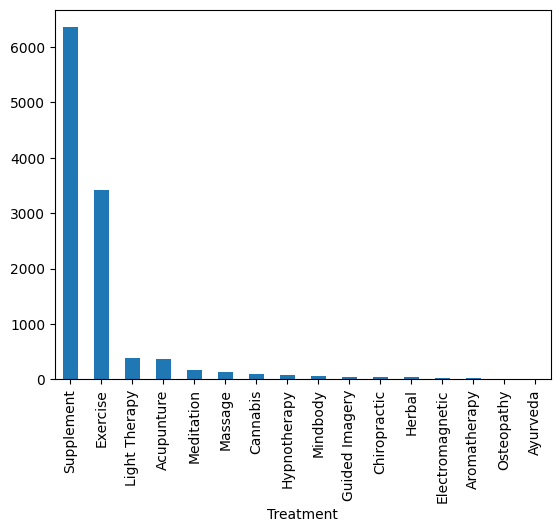

In [30]:
# Bar Graph Showing Amount of Trials for Each Alternative Therapy
alternativetherapies['Treatment'].value_counts().plot(kind='bar', rot=90)

This bar graph shows that taking a supplement is the most frequently studied treatment method involving alternative therapies.  This graph does make Osteopathy and Ayurveda look like there are no studies including these treatment.  Though they are the least occurring they did have results.

**Top 10 Conditions from Alternative Therapy Clinical Trials**

In [31]:
Top_10_Cond = alternativetherapies['Conditions'].value_counts().nlargest(10)
Top_10_Cond

Conditions
Healthy               289
Obesity               140
Breast Cancer          81
Prostate Cancer        65
Metabolic Syndrome     61
Low Back Pain          61
Type 2 Diabetes        60
Multiple Sclerosis     57
Hypertension           52
Stroke                 48
Name: count, dtype: int64

Text(0, 0.5, 'Quantity')

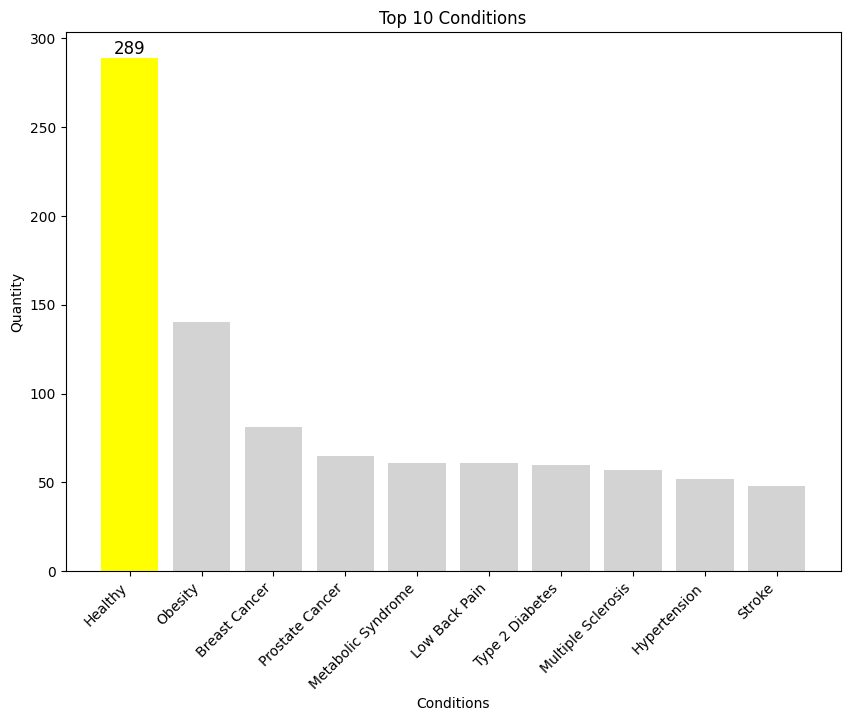

In [32]:
#Create a bar graph for Top 10 Conditions
plt.figure(figsize=(10, 7))
Top_10_Cond

# Highlight the highest value in yellow, remainder in light grey
colors = ['yellow' if i == 0 else 'lightgrey' for i in range(len(Top_10_Cond))]

plt.bar(Top_10_Cond.index, Top_10_Cond.values, color=colors)

# Add value only on the highest value
plt.text(0, Top_10_Cond.values[0], f'{Top_10_Cond.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')

# Formatting for x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Conditions')
plt.xlabel('Conditions')
plt.ylabel('Quantity')


This bar graph indicates that the clinical trial sampled utilize healthy subjects most often to study alternative therapies.

In [33]:
#Line plot comparing Top 10 Conditions and Treatments

In [34]:
#Scatter plot to show correlation between type of alternative therapy vs causes of death

**Cleaning data for natural causes of death dataframe**

In [35]:
#removing rows that have missing data
deaths = deaths.dropna()
deaths.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [36]:
#Dropping unnecessary columns
clmnstodrop2 = ["113 Cause Name"]
deaths = deaths.drop(columns = clmnstodrop2)

deaths

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...
10863,1999,Kidney disease,Virginia,1035,16.9
10864,1999,Kidney disease,Washington,278,5.2
10865,1999,Kidney disease,West Virginia,345,16.4
10866,1999,Kidney disease,Wisconsin,677,11.9


In [37]:
#filtering out rows that are state specific
deaths_byUS = deaths[deaths['State'] == 'United States']
deaths_byUS

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
52,2017,All causes,United States,2813503,731.9
104,2017,Alzheimer's disease,United States,121404,31.0
156,2017,Stroke,United States,146383,37.6
208,2017,CLRD,United States,160201,40.9
...,...,...,...,...,...
10652,1999,Heart disease,United States,725192,266.5
10705,1999,Influenza and pneumonia,United States,63730,23.5
10757,1999,Suicide,United States,29199,10.5
10808,1999,Cancer,United States,549838,200.8


In [38]:
#filtering out deaths that occurred prior to 2000
deaths_byUS = deaths_byUS[deaths_byUS['Year'] >= 2000]
deaths_byUS

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
52,2017,All causes,United States,2813503,731.9
104,2017,Alzheimer's disease,United States,121404,31.0
156,2017,Stroke,United States,146383,37.6
208,2017,CLRD,United States,160201,40.9
...,...,...,...,...,...
10080,2000,Heart disease,United States,710760,257.6
10132,2000,Influenza and pneumonia,United States,65313,23.7
10184,2000,Suicide,United States,29350,10.4
10236,2000,Cancer,United States,553091,199.6


In [39]:
#viewing the different causes of death
CDC_causes_of_death = deaths_byUS['Cause Name'].unique()
CDC_causes_of_death_list = CDC_causes_of_death.tolist()
CDC_causes_of_death_list

['Unintentional injuries',
 'All causes',
 "Alzheimer's disease",
 'Stroke',
 'CLRD',
 'Diabetes',
 'Heart disease',
 'Influenza and pneumonia',
 'Suicide',
 'Cancer',
 'Kidney disease']

**Removing rows that have too broad of causes**

In [40]:
Causes_to_drop = ['Unintentional injuries', 'All causes']
deaths_byUS = deaths_byUS[~deaths_byUS['Cause Name'].isin(Causes_to_drop)]
deaths_byUS

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
104,2017,Alzheimer's disease,United States,121404,31.0
156,2017,Stroke,United States,146383,37.6
208,2017,CLRD,United States,160201,40.9
260,2017,Diabetes,United States,83564,21.5
312,2017,Heart disease,United States,647457,165.0
...,...,...,...,...,...
10080,2000,Heart disease,United States,710760,257.6
10132,2000,Influenza and pneumonia,United States,65313,23.7
10184,2000,Suicide,United States,29350,10.4
10236,2000,Cancer,United States,553091,199.6


**Analysis of most common causes of natural deaths in the United States**

In [41]:
Ascending_deaths = deaths_byUS.sort_values(by='Deaths', ascending= False)
Ascending_deaths.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
10080,2000,Heart disease,United States,710760,257.6
9508,2001,Heart disease,United States,700142,249.5
8936,2002,Heart disease,United States,696947,244.6
8364,2003,Heart disease,United States,685089,236.3
7792,2004,Heart disease,United States,652486,221.6


In [42]:
# Value to check for in 'col1'
value_to_check = "Alzheimer's disease"

# Column to sum
column_to_sum = 'Deaths'

# Filter rows based on the condition
filtered_rows = deaths_byUS[deaths_byUS['Cause Name'] == value_to_check]

# Sum the specified column in the filtered rows
sum_of_column = filtered_rows[column_to_sum].sum()

print(sum_of_column)

1450280


In [43]:
# List of Causes of Death
values_to_check = CDC_causes_of_death_list

# Column to sum
column_to_sum = 'Deaths'

# Create a list to store results
results = []

# Loop through each value and compute the sum
for value in values_to_check:
    filtered_rows = deaths_byUS[deaths_byUS['Cause Name'] == value] # Filter rows based on value
    sum_of_column = filtered_rows[column_to_sum].sum()  # Sum the specified column
    results.append({'Cause Name': value, 'Total Deaths': sum_of_column})# Store result in dictionary

#Create ne Dataframe from results
CDC_causes_of_death_results = pd.DataFrame(results)
CDC_causes_of_death_results


,Cause Name,Total Deaths
0,Unintentional injuries,0
1,All causes,0
2,Alzheimer's disease,1450280
3,Stroke,2559157
4,CLRD,2470746
5,Diabetes,1331544
6,Heart disease,11497448
7,Influenza and pneumonia,1030911
8,Suicide,667817
9,Cancer,10293806


In [44]:
#removing rows that are too broad
Causes_to_drop = ['Unintentional injuries', 'All causes']
CDC_causes_of_death_results = CDC_causes_of_death_results[~CDC_causes_of_death_results['Cause Name'].isin(Causes_to_drop)]
CDC_causes_of_death_results

,Cause Name,Total Deaths
2,Alzheimer's disease,1450280
3,Stroke,2559157
4,CLRD,2470746
5,Diabetes,1331544
6,Heart disease,11497448
7,Influenza and pneumonia,1030911
8,Suicide,667817
9,Cancer,10293806
10,Kidney disease,823088


In [45]:
Ascending_cdcdeaths = CDC_causes_of_death_results.sort_values(by='Total Deaths', ascending= False)
Ascending_cdcdeaths.head()

,Cause Name,Total Deaths
6,Heart disease,11497448
9,Cancer,10293806
3,Stroke,2559157
4,CLRD,2470746
2,Alzheimer's disease,1450280


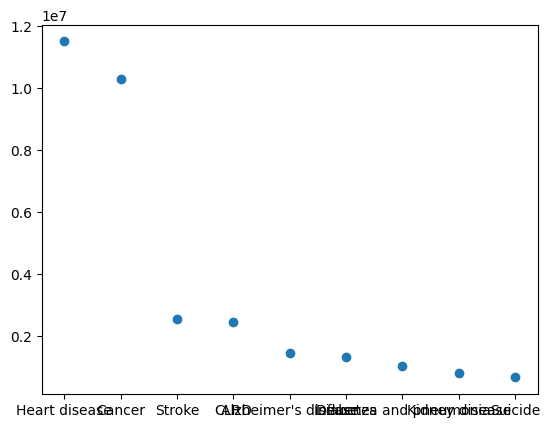

In [47]:
import matplotlib.pyplot as plt
plt.scatter(Ascending_cdcdeaths['Cause Name'], Ascending_cdcdeaths['Total Deaths'])
plt.show()

In [52]:

CDC_Causes = CDC_causes_of_death_results['Cause Name']
CDC_Causes

2         Alzheimer's disease
3                      Stroke
4                        CLRD
5                    Diabetes
6               Heart disease
7     Influenza and pneumonia
8                     Suicide
9                      Cancer
10             Kidney disease
Name: Cause Name, dtype: object

<Axes: xlabel='Cause Name'>

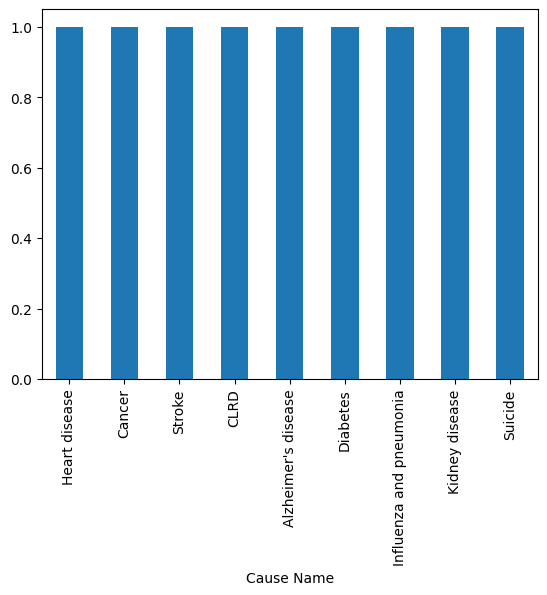

In [56]:
Ascending_cdcdeaths['Cause Name'].value_counts().plot(kind='bar', rot=90)

# Conclusion

**More information is needed to determine a correlation bewteen alternative therapies clinical trials and the most common natural causes of death in the United States.  Obesity was the highest condition researched in the alternative therapies sample set.  Obesity considered a factor in the onset of multiple health issues, so we cannot say they obesity and alternative therapys study with it are not a result of a common cause of deaths like heart disease.  Cancer alternative therapy clinical trial were the second most researched, and cancer is the second leading cause of death.  Perhaps the data set was too small to determine a correlation or alternative therapy research is not a result of a national need.**